# Battle of Neighborhood - Week 1

## Introduction: Best place to open a Restaurant with Indian cuisine (restricted menu)...

Recently a friend of mine approached me for my advice on opening a restricted menu restaurant in Delhi (India) considering financialy turbulent times in covid era. And here comes the Capstone project where I am supposed to do ceratin analysis on neighborhood's. So am making certain assumptions to make it fit for this project.

## Business Problem
* My friend wants to go global.
* Initial Choice was between Newyork and Toronto, However after analysing census data, advice was to open it in Toronto which is having sizable population of South Asians. As this is the group which will become  patrons in initial phase.
* Still idea of restaurant is with restricted menu (we are on same frequency on this part).
* Both cities are very diverse and financial capital of their respective country.

### Considerations
* South Asian population
* Market
* Nearby places contibuting potential clients
* other reataurant's in area and possible competition as well as potential clients.

### Approach
* Data driven.
* leveraging python capabilities with folium, foursquare and matplotlib for visualization and sklearn for analysis.

### Data
* Demographic data of Toronto.
* Neighborhood data for Toronto.
* Venue data for Toronto.
* Venues specific to Indian cuisine...

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
# Matplotlib and associated plotting modules
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
import sklearn
from sklearn.cluster import KMeans
import folium # map rendering library

print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Requests version: {requests.__version__}")
print(f"sklearn version: {sklearn.__version__}")
print(f"folium version: {folium.__version__}")

Matplotlib version: 3.4.2
Numpy version: 1.21.0
Pandas version: 1.2.5
Requests version: 2.15.1
sklearn version: 0.24.2
folium version: 0.12.1


## Data

### Demographic data of Toronto

Neighborhood profile data for city of [Toronto](https://open.toronto.ca/dataset/neighbourhood-profiles/)

In [2]:
np_data = "./data/neighbourhood-profiles-2016.csv"
np_toronto = pd.read_csv(np_data)
np_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Columns: 146 entries, _id to Yorkdale-Glen Park
dtypes: int64(1), object(145)
memory usage: 2.7+ MB


In [3]:
np_toronto.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [13]:
np_toronto['Characteristic'] = np_toronto.Characteristic.str.strip()
characteristics = ['Population, 2016', 'Indo-Aryan languages', 'Punjabi (Panjabi)']

cond1 = np_toronto['Characteristic'].isin(characteristics)
cond2 = np_toronto['Topic'].isin(["Mother tongue", "Population and dwellings"])  
toronto_character = np_toronto[cond1 & cond2]
toronto_ind_diaspora = toronto_character.T.iloc[4:, :]
toronto_ind_diaspora


,2,303,312
Characteristic,"Population, 2016",Indo-Aryan languages,Punjabi (Panjabi)
City of Toronto,"2,731,571","138,625","19,965"
Agincourt North,"29,113",910,105
Agincourt South-Malvern West,"23,757","1,500",165
Alderwood,"12,054",205,15
...,...,...,...
Wychwood,"14,349",80,25
Yonge-Eglinton,"11,817",115,10
Yonge-St.Clair,"12,528",130,20
York University Heights,"27,593","1,710",265


In [15]:
cols = [ 'pop2016', 'indo_aryan', 'punjabi']
toronto_ind_diaspora.columns = cols
# toronto_ind = toronto_ind_diaspora.iloc[1:, :]
toronto_ind = pd.DataFrame(index=toronto_ind_diaspora.index[2:])
indo_aryan = toronto_ind_diaspora.loc[:, 'indo_aryan'].str.replace(',', '')
toronto_ind['indo_aryan'] = indo_aryan
pop2016 = toronto_ind_diaspora.loc[:, 'pop2016'].str.replace(',', '')
toronto_ind['pop2016'] = pop2016
punjabi = toronto_ind_diaspora.loc[:, 'punjabi'].str.replace(',', '')
toronto_ind['punjabi'] = punjabi
toronto_ind.head()

,indo_aryan,pop2016,punjabi
Agincourt North,910,29113,105
Agincourt South-Malvern West,1500,23757,165
Alderwood,205,12054,15
Annex,400,30526,50
Banbury-Don Mills,1065,27695,40


In [18]:
toronto_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Agincourt North to Yorkdale-Glen Park
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   indo_aryan  140 non-null    object
 1   pop2016     140 non-null    object
 2   punjabi     140 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [19]:
toronto_ind['indo_aryan'] = toronto_ind['indo_aryan'].astype('float64')
toronto_ind['pop2016'] = toronto_ind['pop2016'].astype('float64')
toronto_ind['punjabi'] = toronto_ind['punjabi'].astype('float64')

In [20]:
toronto_ind['%pop'] = (
    (toronto_ind['indo_aryan'] + toronto_ind['punjabi']) / toronto_ind['pop2016']) * 100
toronto_ind.head()

,indo_aryan,pop2016,punjabi,%pop
Agincourt North,910.0,29113.0,105.0,3.486415
Agincourt South-Malvern West,1500.0,23757.0,165.0,7.008461
Alderwood,205.0,12054.0,15.0,1.825120
Annex,400.0,30526.0,50.0,1.474153
Banbury-Don Mills,1065.0,27695.0,40.0,3.989890


In [22]:
# plot top 10 neighborhood with indian diaspora
ind_in_toronto = toronto_ind.sort_values('%pop', ascending=False)
ind_in_toronto

,indo_aryan,pop2016,punjabi,%pop
West Humber-Clairville,8710.0,33312.0,4925.0,40.931196
Thorncliffe Park,7140.0,21108.0,435.0,35.886868
Humber Summit,2615.0,12416.0,975.0,28.914304
Mount Olive-Silverstone-Jamestown,6870.0,32954.0,2635.0,28.843236
Taylor-Massey,4065.0,15683.0,100.0,26.557419
...,...,...,...,...
Briar Hill-Belgravia,70.0,14257.0,15.0,0.596198
The Beaches,90.0,21567.0,20.0,0.510038
Bedford Park-Nortown,100.0,23236.0,10.0,0.473403
Runnymede-Bloor West Village,40.0,10070.0,5.0,0.446872


In [9]:
ind_in_toronto.to_csv("./data/toronto_neighborhoods.csv", index=True)

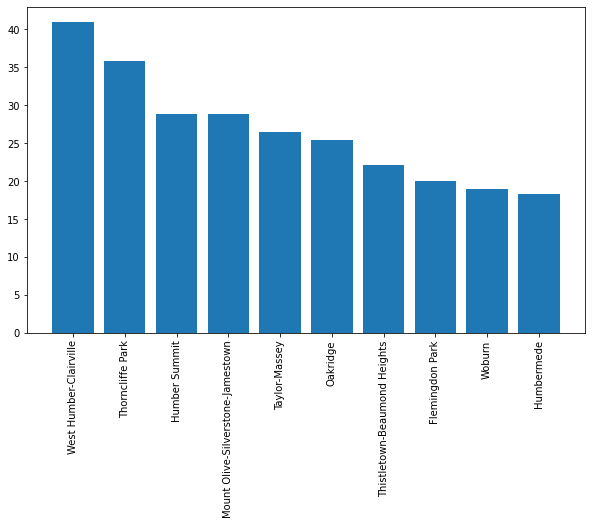

In [23]:
# visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(ind_in_toronto.index[:10], ind_in_toronto['%pop'][:10])
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [24]:
# There are 140 neighborhoods in Toronto, ON, Canada
neighborhoods = ind_in_toronto.index.tolist()
neighborhoods[:10]

['West Humber-Clairville',
 'Thorncliffe Park',
 'Humber Summit',
 'Mount Olive-Silverstone-Jamestown',
 'Taylor-Massey',
 'Oakridge',
 'Thistletown-Beaumond Heights',
 'Flemingdon Park',
 'Woburn',
 'Humbermede']

### Coordinates of Toronto Neighborhood

Note: have used google api to get the geocode for these neighborhood and saved as csv file to not to incur cost while running this notebook every time

In [89]:
from geopy.geocoders import Nominatim

In [26]:
# loading coordinates data file for neighborhoods

df_coords = pd.read_csv("./data/toronto_neighborhoods.csv")
df_coords.head()

,S_No,Neighborhood,lat,lon,pop2016,indo_aryan,punjabi,%pop
0,1,West Humber-Clairville,43.755174,-79.627079,33312,8710,4925,40.93
1,2,Thorncliffe Park,43.708683,-79.349370,21108,7140,435,35.89
2,3,Humber Summit,43.757886,-79.559063,12416,2615,975,28.91
3,4,Mount Olive-Silverstone-Jamestown,43.742375,-79.588163,32954,6870,2635,28.84
4,5,Taylor-Massey,43.745433,-79.284514,15683,4065,100,26.56


## Map of Toronto with its neighborhood

In [27]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_exp")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [28]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_coords['lat'],
                                           df_coords['lon'],
                                           df_coords['Neighborhood']):
    label = f'{neighborhood}'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Using Four Square API to explore neighborhood

In [29]:
from configparser import ConfigParser

config = ConfigParser()
config.read("./keys.ini")

client_id = config.get("foursquare", 'ApiKey')
client_secret = config.get("foursquare", 'ApiSecret')
version = '20210704'
limit = 100 # A default Foursquare API limit value

In [36]:
# testing for West Humber-Clairville, lat:43.755174, lon:-79.627079
url = 'https://api.foursquare.com/v2/venues/explore'
params = dict(
    client_id = client_id,
    client_secret = client_secret,
    v = version,
    ll = "43.755174, -79.627079",
    query="restaurant",
    radius=2000,
    limit=100
)
results = requests.get(url=url, params=params)
results

<Response [200]>

In [37]:
results.json()

{'meta': {'code': 200, 'requestId': '60e07deca8f5af04c3f4abab'},
 'response': {'headerLocation': 'Vaughan',
  'headerFullLocation': 'Vaughan',
  'headerLocationGranularity': 'city',
  'query': 'restaurant',
  'totalResults': 5,
  'suggestedBounds': {'ne': {'lat': 43.77317401800001,
    'lng': -79.60220516327264},
   'sw': {'lat': 43.73717398199998, 'lng': -79.65195283672735}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c8baba11797236a141c6d88',
       'name': 'Samosa & Sweet Factory',
       'location': {'address': '1850 Albion Road',
        'lat': 43.74659,
        'lng': -79.615189,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.74659,
          'lng': -79.615189}],
        'distance': 1351,
        'cc': 'CA',
        'city': 'Toronto',
   

In [40]:
### Before we proceed, let's borrow the **getNearbyVenues** function from the Foursquare lab to get the venue and category

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    counter = 0
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        counter += 1
        if counter % 5 != 0:
            print(name, end=" ")
        else:
            print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore'
        params = dict(
            client_id = client_id,
            client_secret = client_secret,
            v = version,
            ll = f"{lat}, {lng}",
            query='restaurant',
            radius=radius,
            limit=limit
        )
            
        # make the GET request
        results = requests.get(url=url, params=params).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighborhood', 
                             'neighborhood_lat',  
                             'neighborhood_lon',
                             'venue', 
                             'venue_lat', 
                             'venue_lon', 
                             'venue_cat']
    
    return(nearby_venues)

In [46]:
toronto_nghd = getNearbyVenues(
    names=df_coords['Neighborhood'],
    latitudes=df_coords['lat'],
    longitudes=df_coords['lon'])

West Humber-Clairville Thorncliffe Park Humber Summit Mount Olive-Silverstone-Jamestown Taylor-Massey
Oakridge Thistletown-Beaumond Heights Flemingdon Park Woburn Humbermede
Malvern Regent Park Clairlea-Birchmount Scarborough Village Bendale
Kennedy Park Kingsview Village-The Westway Highland Creek North St. James Town Rouge
Dorset Park Henry Farm Cliffcrest Morningside Victoria Village
Ionview Rexdale-Kipling West Hill York University Heights Eglinton East
Agincourt South-Malvern West Willowridge-Martingrove-Richview Maple Leaf Centennial Scarborough 'Tam O''Shanter-Sullivan'
East End-Danforth Greenwood-Coxwell 'O''Connor-Parkview' Blake-Jones Parkwoods-Donalda
Wexford/Maryvale Don Valley Village Elms-Old Rexdale 'L''Amoreaux' Etobicoke West Mall
Waterfront Communities-The Island Bay Street Corridor Danforth Birchcliffe-Cliffside Banbury-Don Mills
Hillcrest Village Pleasant View Church-Yonge Corridor Islington-City Centre West Agincourt North
Keelesdale-Eglinton West Moss Park Brookha

In [47]:
toronto_nghd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9034 entries, 0 to 9033
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighborhood      9034 non-null   object 
 1   neighborhood_lat  9034 non-null   float64
 2   neighborhood_lon  9034 non-null   float64
 3   venue             9034 non-null   object 
 4   venue_lat         9034 non-null   float64
 5   venue_lon         9034 non-null   float64
 6   venue_cat         9034 non-null   object 
dtypes: float64(4), object(3)
memory usage: 494.2+ KB


In [51]:
toronto_nghd.head(2)

,neighborhood,neighborhood_lat,neighborhood_lon,venue,venue_lat,venue_lon,venue_cat
0,West Humber-Clairville,43.755174,-79.627079,Samosa & Sweet Factory,43.746590,-79.615189,Indian Restaurant
1,West Humber-Clairville,43.755174,-79.627079,Exotic indian cuisine,43.745956,-79.615838,Indian Restaurant


In [48]:
toronto_nghd.groupby('neighborhood').count()

,neighborhood_lat,neighborhood_lon,venue,venue_lat,venue_lon,venue_cat
neighborhood,,,,,,
'L''Amoreaux',26,26,26,26,26,26
'O''Connor-Parkview',31,31,31,31,31,31
'Tam O''Shanter-Sullivan',76,76,76,76,76,76
Agincourt North,46,46,46,46,46,46
Agincourt South-Malvern West,62,62,62,62,62,62
...,...,...,...,...,...,...
Wychwood,100,100,100,100,100,100
Yonge-Eglinton,100,100,100,100,100,100
Yonge-St.Clair,100,100,100,100,100,100


In [49]:
# Unique venue categories
print(f"There are {len(toronto_nghd['venue_cat'].unique())} uniques categories.")

There are 115 uniques categories.


### Analyze each neighborhood

In [57]:
toronto_oh = pd.get_dummies(toronto_nghd[['venue_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_oh['neighborhood'] = toronto_nghd['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_oh.columns[-1]] + list(toronto_oh.columns[:-1])
toronto_oh = toronto_oh[fixed_columns]

toronto_oh.head()

,neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,...,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Xinjiang Restaurant
0,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,West Humber-Clairville,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
toronto_oh.shape

(9034, 116)

In [61]:
# group by neighborhood
toronto_grpd = toronto_oh.groupby('neighborhood').mean().reset_index()
toronto_grpd

,neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,...,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Xinjiang Restaurant
0,'L''Amoreaux',0.000000,0.00,0.000000,0.00000,0.000000,0.038462,0.000000,0.076923,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.076923,0.000000,0.0
1,'O''Connor-Parkview',0.000000,0.00,0.000000,0.00000,0.000000,0.032258,0.000000,0.064516,0.0,...,0.0,0.064516,0.0,0.0,0.0,0.0,0.032258,0.000000,0.000000,0.0
2,'Tam O''Shanter-Sullivan',0.000000,0.00,0.000000,0.00000,0.026316,0.000000,0.000000,0.039474,0.0,...,0.0,0.013158,0.0,0.0,0.0,0.0,0.000000,0.052632,0.013158,0.0
3,Agincourt North,0.021739,0.00,0.000000,0.00000,0.021739,0.021739,0.000000,0.086957,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.108696,0.000000,0.0
4,Agincourt South-Malvern West,0.016129,0.00,0.032258,0.00000,0.016129,0.000000,0.000000,0.080645,0.0,...,0.0,0.016129,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,0.000000,0.02,0.010000,0.00000,0.000000,0.020000,0.010000,0.070000,0.0,...,0.0,0.030000,0.0,0.0,0.0,0.0,0.020000,0.000000,0.000000,0.0
136,Yonge-Eglinton,0.000000,0.00,0.010000,0.00000,0.040000,0.000000,0.020000,0.060000,0.0,...,0.0,0.030000,0.0,0.0,0.0,0.0,0.010000,0.010000,0.010000,0.0
137,Yonge-St.Clair,0.000000,0.00,0.030000,0.00000,0.000000,0.020000,0.020000,0.030000,0.0,...,0.0,0.050000,0.0,0.0,0.0,0.0,0.010000,0.010000,0.010000,0.0
138,York University Heights,0.000000,0.00,0.013158,0.00000,0.013158,0.000000,0.013158,0.000000,0.0,...,0.0,0.026316,0.0,0.0,0.0,0.0,0.000000,0.065789,0.013158,0.0


In [62]:
# function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [69]:
# create the dataframe

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grpd['neighborhood']

for ind in np.arange(toronto_grpd.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grpd.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,'L''Amoreaux',Chinese Restaurant,Restaurant,Vietnamese Restaurant,Bakery,Caribbean Restaurant,Breakfast Spot,Sandwich Place,Japanese Restaurant,Dim Sum Restaurant,Fast Food Restaurant
1,'O''Connor-Parkview',Pizza Place,Restaurant,Fast Food Restaurant,Thai Restaurant,Indian Restaurant,Bakery,Sandwich Place,Chinese Restaurant,Greek Restaurant,Café
2,'Tam O''Shanter-Sullivan',Chinese Restaurant,Restaurant,Fast Food Restaurant,Pizza Place,Vietnamese Restaurant,Cantonese Restaurant,Korean Restaurant,Bakery,Burrito Place,Asian Restaurant
3,Agincourt North,Chinese Restaurant,Vietnamese Restaurant,Bakery,Indian Restaurant,Restaurant,Sandwich Place,Pizza Place,Korean Restaurant,Caribbean Restaurant,Noodle House
4,Agincourt South-Malvern West,Restaurant,Chinese Restaurant,Bakery,Caribbean Restaurant,Indian Restaurant,Pizza Place,Fast Food Restaurant,American Restaurant,Sushi Restaurant,Italian Restaurant


In [70]:
n_clust = 10

toronto_grp_clst = toronto_grpd.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(toronto_grp_clst)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 8, 3, 3, 1, 1, 4, 1, 1, 7], dtype=int32)

In [71]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto = df_coords

# merge toronto_grpd with df to add latitude/longitude for each neighborhood
toronto = toronto.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how='inner')

toronto.head() # check the last columns!

,S_No,Neighborhood,lat,lon,pop2016,indo_aryan,punjabi,%pop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,West Humber-Clairville,43.755174,-79.627079,33312,8710,4925,40.93,5,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Caribbean Restaurant,New American Restaurant,Poutine Place,Portuguese Restaurant,Polish Restaurant,Poke Place,Pizza Place
1,2,Thorncliffe Park,43.708683,-79.349370,21108,7140,435,35.89,1,Restaurant,Indian Restaurant,Japanese Restaurant,Café,Burger Joint,Sandwich Place,Turkish Restaurant,Sushi Restaurant,Chinese Restaurant,Breakfast Spot
2,3,Humber Summit,43.757886,-79.559063,12416,2615,975,28.91,6,Italian Restaurant,Vietnamese Restaurant,Bakery,Fast Food Restaurant,Pizza Place,Restaurant,Asian Restaurant,Portuguese Restaurant,Wings Joint,Mexican Restaurant
3,4,Mount Olive-Silverstone-Jamestown,43.742375,-79.588163,32954,6870,2635,28.84,1,Restaurant,Indian Restaurant,Pizza Place,Fast Food Restaurant,Caribbean Restaurant,Café,Italian Restaurant,Burger Joint,Sandwich Place,Japanese Restaurant
4,5,Taylor-Massey,43.745433,-79.284514,15683,4065,100,26.56,1,Restaurant,Pizza Place,Indian Restaurant,Chinese Restaurant,Burger Joint,Asian Restaurant,Middle Eastern Restaurant,Bakery,Fried Chicken Joint,Vietnamese Restaurant


In [72]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clust)
ys = [i + x + (i*x)**2 for i in range(n_clust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto['lat'], toronto['lon'], toronto['Neighborhood'], toronto['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [88]:
toronto.loc[toronto['Cluster Labels'] == 0, toronto.columns[[1] + list(range(5, toronto.shape[1]))]]

,Neighborhood,indo_aryan,punjabi,%pop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
52,Church-Yonge Corridor,1015,80,3.49,0,Korean Restaurant,Pizza Place,Restaurant,Japanese Restaurant,Fast Food Restaurant,Ramen Restaurant,Fried Chicken Joint,Sushi Restaurant,Café,Vietnamese Restaurant
64,Willowdale East,1240,60,2.58,0,Korean Restaurant,Restaurant,Pizza Place,Japanese Restaurant,Fast Food Restaurant,Ramen Restaurant,Fried Chicken Joint,Sushi Restaurant,Café,Sandwich Place
79,Newtonbrook East,295,30,2.02,0,Korean Restaurant,Café,Restaurant,Pizza Place,Middle Eastern Restaurant,Japanese Restaurant,Sushi Restaurant,Wings Joint,Fast Food Restaurant,Fried Chicken Joint
81,Lansing-Westgate,295,20,1.95,0,Restaurant,Pizza Place,Japanese Restaurant,Fast Food Restaurant,Ramen Restaurant,Sushi Restaurant,Korean Restaurant,Fried Chicken Joint,Middle Eastern Restaurant,Chinese Restaurant
84,Willowdale West,295,25,1.89,0,Korean Restaurant,Pizza Place,Restaurant,Japanese Restaurant,Ramen Restaurant,Fast Food Restaurant,Fried Chicken Joint,Café,Sushi Restaurant,Sandwich Place
102,Newtonbrook West,315,20,1.41,0,Korean Restaurant,Middle Eastern Restaurant,Pizza Place,Restaurant,Sushi Restaurant,Café,Fast Food Restaurant,Bagel Shop,Chinese Restaurant,Japanese Restaurant


In [50]:
catg = toronto_nghd['venue_cat'].unique()
catg

array(['Indian Restaurant', 'Caribbean Restaurant',
       'Mediterranean Restaurant', 'Japanese Restaurant', 'BBQ Joint',
       'Afghan Restaurant', 'Fish & Chips Shop', 'Pakistani Restaurant',
       'Turkish Restaurant', 'Restaurant', 'Fast Food Restaurant',
       'Breakfast Spot', 'Sandwich Place', 'Pizza Place',
       'Sushi Restaurant', 'Bakery', 'Burger Joint', 'Greek Restaurant',
       'Fried Chicken Joint', 'Middle Eastern Restaurant',
       'Mexican Restaurant', 'Asian Restaurant', 'Café',
       'Falafel Restaurant', 'Bagel Shop', 'Chinese Restaurant',
       'Deli / Bodega', 'Vietnamese Restaurant', 'Food Court',
       'Italian Restaurant', 'Portuguese Restaurant', 'Wings Joint',
       'Steakhouse', 'American Restaurant', 'Korean Restaurant',
       'Seafood Restaurant', 'Indian Chinese Restaurant',
       'Tex-Mex Restaurant', 'Cafeteria', 'Thai Restaurant', 'Diner',
       'Filipino Restaurant', 'Dim Sum Restaurant',
       'Sri Lankan Restaurant', 'Hakka Restauran

In [52]:
# Restaurant Categories by region
s_asian = ['Indian Restaurant', 'Afghan Restaurant', 'Pakistani Restaurant', 'Sri Lankan Restaurant',
          'Halal Restaurant']
ne_asian = ['Japanese Restaurant', 'Cantonese Restaurant', 'Sushi Restaurant', 'Chinese Restaurant',
           'Korean Restaurant', 'Hakka Restaurant', 'Taiwanese Restaurant', 'Xinjiang Restaurant',
           'Hong Kong Restaurant', 'Peking Duck Restaurant', 'Szechuan Restaurant',
           'Tibetan Restaurant', 'Dumpling Restaurant', 'Shanghai Restaurant']
se_asian = ['Vietnamese Restaurant', 'Thai Restaurant', 'Filipino Restaurant', 'Malay Restaurant',
           'Indonesian Restaurant']

In [53]:
restaurants = toronto_nghd['venue_cat'].tolist()
restaurants[:5]

['Indian Restaurant',
 'Indian Restaurant',
 'Caribbean Restaurant',
 'Mediterranean Restaurant',
 'Japanese Restaurant']

In [55]:
def res_region(x):
    if x in s_asian:
        res = 'south_asian'
    elif x in ne_asian:
        res = 'northeast_asian'
    elif x in se_asian:
        res = 'southeast_asian'
    else:
        res = 'others'
    return res

region = [res_region(x) for x in restaurants]
region[:5]

['south_asian', 'south_asian', 'others', 'others', 'northeast_asian']

In [56]:
toronto_nghd['region'] = region
toronto_nghd.head(5)

,neighborhood,neighborhood_lat,neighborhood_lon,venue,venue_lat,venue_lon,venue_cat,region
0,West Humber-Clairville,43.755174,-79.627079,Samosa & Sweet Factory,43.746590,-79.615189,Indian Restaurant,south_asian
1,West Humber-Clairville,43.755174,-79.627079,Exotic indian cuisine,43.745956,-79.615838,Indian Restaurant,south_asian
2,West Humber-Clairville,43.755174,-79.627079,Pattie World,43.755573,-79.604765,Caribbean Restaurant,others
3,West Humber-Clairville,43.755174,-79.627079,Pita Lite,43.772960,-79.625320,Mediterranean Restaurant,others
4,West Humber-Clairville,43.755174,-79.627079,Teriyaki Experience,43.773108,-79.625001,Japanese Restaurant,northeast_asian


In [75]:
toronto_oh_reg = pd.get_dummies(toronto_nghd[['region']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_oh_reg['neighborhood'] = toronto_nghd['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_oh_reg.columns[-1]] + list(toronto_oh_reg.columns[:-1])
toronto_oh_reg = toronto_oh_reg[fixed_columns]

toronto_oh_reg.head()

,neighborhood,northeast_asian,others,south_asian,southeast_asian
0,West Humber-Clairville,0,0,1,0
1,West Humber-Clairville,0,0,1,0
2,West Humber-Clairville,0,1,0,0
3,West Humber-Clairville,0,1,0,0
4,West Humber-Clairville,1,0,0,0


In [85]:
# group by neighborhood
toronto_grpd_reg = toronto_oh_reg.groupby('neighborhood').mean().reset_index()
toronto_grpd_reg

,neighborhood,northeast_asian,others,south_asian,southeast_asian
0,'L''Amoreaux',0.307692,0.615385,0.000000,0.076923
1,'O''Connor-Parkview',0.032258,0.838710,0.064516,0.064516
2,'Tam O''Shanter-Sullivan',0.342105,0.578947,0.000000,0.078947
3,Agincourt North,0.347826,0.434783,0.108696,0.108696
4,Agincourt South-Malvern West,0.193548,0.677419,0.080645,0.048387
...,...,...,...,...,...
135,Wychwood,0.110000,0.800000,0.060000,0.030000
136,Yonge-Eglinton,0.170000,0.740000,0.040000,0.050000
137,Yonge-St.Clair,0.110000,0.800000,0.020000,0.070000
138,York University Heights,0.131579,0.776316,0.000000,0.092105


In [77]:
n_clust = 4

toronto_grp_clst_reg = toronto_grpd_reg.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(toronto_grp_clst_reg)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 2, 1, 0, 3, 3, 0, 3], dtype=int32)

In [86]:
toronto_grpd_reg.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_reg = df_coords



# merge toronto_grpd with df to add latitude/longitude for each neighborhood
toronto_reg = toronto_reg.merge(toronto_grpd_reg, left_on='Neighborhood', right_on='neighborhood', how='inner')

toronto_reg.head() # check the last columns!

,S_No,Neighborhood,lat,lon,pop2016,indo_aryan,punjabi,%pop,Cluster Labels,neighborhood,northeast_asian,others,south_asian,southeast_asian
0,1,West Humber-Clairville,43.755174,-79.627079,33312,8710,4925,40.93,2,West Humber-Clairville,0.200000,0.400000,0.400000,0.000000
1,2,Thorncliffe Park,43.708683,-79.349370,21108,7140,435,35.89,3,Thorncliffe Park,0.153846,0.692308,0.153846,0.000000
2,3,Humber Summit,43.757886,-79.559063,12416,2615,975,28.91,3,Humber Summit,0.076923,0.807692,0.000000,0.115385
3,4,Mount Olive-Silverstone-Jamestown,43.742375,-79.588163,32954,6870,2635,28.84,3,Mount Olive-Silverstone-Jamestown,0.064516,0.774194,0.161290,0.000000
4,5,Taylor-Massey,43.745433,-79.284514,15683,4065,100,26.56,3,Taylor-Massey,0.088235,0.779412,0.102941,0.029412


In [87]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clust)
ys = [i + x + (i*x)**2 for i in range(n_clust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_reg['lat'], toronto_reg['lon'], toronto_reg['Neighborhood'], toronto_reg['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [92]:

toronto_reg.loc[toronto_reg['Cluster Labels'] == 3, toronto_reg.columns[[1] + list(range(5, toronto_reg.shape[1]))]]

,Neighborhood,indo_aryan,punjabi,%pop,Cluster Labels,neighborhood,northeast_asian,others,south_asian,southeast_asian
1,Thorncliffe Park,7140,435,35.89,3,Thorncliffe Park,0.153846,0.692308,0.153846,0.000000
2,Humber Summit,2615,975,28.91,3,Humber Summit,0.076923,0.807692,0.000000,0.115385
3,Mount Olive-Silverstone-Jamestown,6870,2635,28.84,3,Mount Olive-Silverstone-Jamestown,0.064516,0.774194,0.161290,0.000000
4,Taylor-Massey,4065,100,26.56,3,Taylor-Massey,0.088235,0.779412,0.102941,0.029412
5,Oakridge,3465,60,25.46,3,Oakridge,0.161290,0.774194,0.000000,0.064516
6,Thistletown-Beaumond Heights,1640,660,22.20,3,Thistletown-Beaumond Heights,0.076923,0.653846,0.153846,0.115385
7,Flemingdon Park,4245,140,19.99,3,Flemingdon Park,0.153846,0.730769,0.115385,0.000000
9,Humbermede,2130,715,18.30,3,Humbermede,0.052632,0.736842,0.000000,0.210526
10,Malvern,5705,695,14.61,3,Malvern,0.066667,0.800000,0.066667,0.066667
11,Regent Park,1470,30,13.89,3,Regent Park,0.110000,0.830000,0.010000,0.050000
